In [9]:
import pandas as pd 
df= pd.read_csv('../datasets/normalized_sample_emissions_for_anomaly_detection.csv')
df.head()

,Identifiant de l'élément,Nom base français,normalized_emissions,modifed_emissions,true_anomaly
0,34052,"""""""\tSalade César au poulet (salade verte""""""",0.044497,0.044497,0
1,40963,"""""""Barre céréalière """"""""équilibre"""""""" aux frui...",0.038913,0.038913,0
2,40964,"""""""Barre céréalière """"""""équilibre"""""""" chocolat...",0.096827,0.096827,0
3,39789,"""""""Bière """"""""coeur de marché"""""""" (4-5° alcool)""""""",0.017534,0.017534,0
4,39790,"""""""Bière """"""""de spécialités"""""""" ou d'abbaye""""""",0.017534,0.017534,0


In [10]:
min_val = df['modifed_emissions'].min()
max_val = df['modifed_emissions'].max()
print(f"Min: {min_val}, Max: {max_val}")


Min: 0.0, Max: 2.0


# ISOLATION FORREST

In [11]:
from pyod.models.iforest import IForest
X = df[['modifed_emissions']].values

model = IForest(
    n_estimators=100,
    max_samples='auto',
    contamination=0.02,  
    max_features=1.0,
    random_state=19
)



 Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4215
           1       0.81      0.75      0.78        87

    accuracy                           0.99      4302
   macro avg       0.90      0.87      0.89      4302
weighted avg       0.99      0.99      0.99      4302



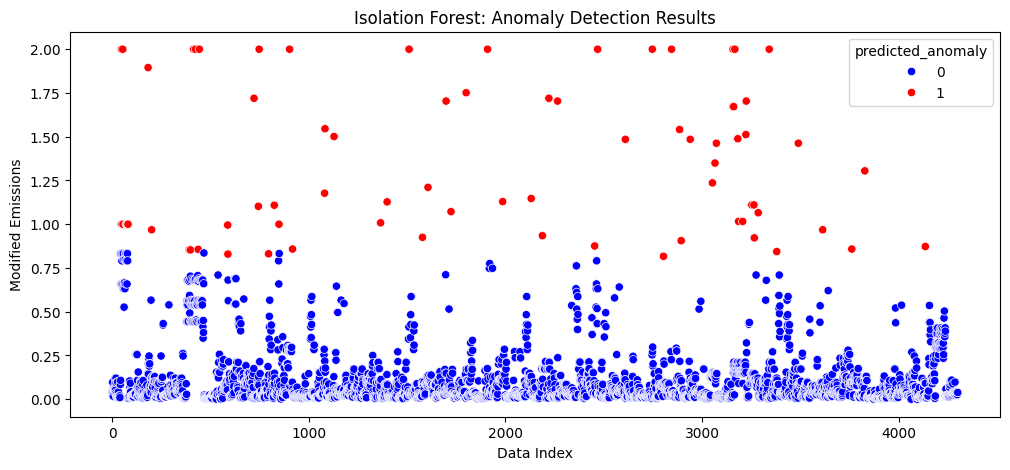

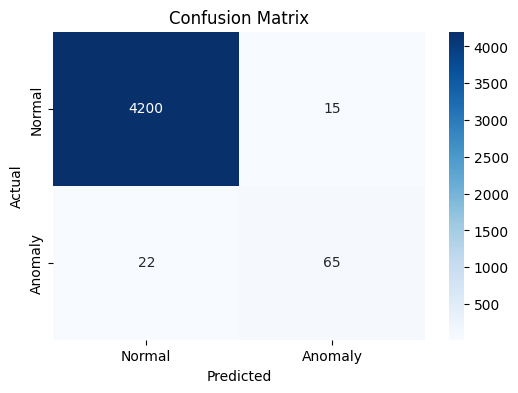

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

model.fit(X)

predictions = model.predict(X)

scores = model.decision_function(X)

true_labels = df['true_anomaly'].values

df['predicted_anomaly'] = predictions


print("\n Classification Report:")
print(classification_report(true_labels, predictions))


plt.figure(figsize=(12, 5))
sns.scatterplot(
    x=range(len(df)),
    y=df['modifed_emissions'],
    hue=df['predicted_anomaly'],
    palette={0: 'blue', 1: 'red'},
    legend='full'
)
plt.title("Isolation Forest: Anomaly Detection Results")
plt.xlabel("Data Index")
plt.ylabel("Modified Emissions")
plt.show()

cm = confusion_matrix(true_labels, predictions)
labels = ['Normal', 'Anomaly']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# One-Class SVM

# Local Outlier Factor
